
-----------------

1. EDA DESCRIPTION

------------------

1. Write a approx 750-800 (3PAGE) word description of: 
    - EDA application (e.g., use-case, domain of operation).
    - Describe 3 interesting results from the EDA.
    - How you connected your work to lecture material 
    - Advanced techniques that you used
    - References for API or websites

If you are submitting a PDF, please mention that here. 

-----------------------------------------------------
This project is an exploratory data analysis focusing on identifying patterns, correlations and market movements within the cryptocurrency domain. Cryptocurrencies are inherently volatile, making data-driven insights a critical factor for investors, analysts and even policy makers. Leveraging historical data, including prices, trading volumes, and metadata for cryptocurrencies, this study focuses on analysing market trends, identifying relationships between key variables, and exploring market efficiency and liquidity.
Using data sourced from CoinAPi the analysis examines various variables. Data cleaning, preparation and transformation ensured the data was reliable and interpretable, making sure advanced analyses like temporal trends and volume-price relationships could be carried out.

The 3 main interesting results:

1.	Correlations between trading volumes across timeframes revealed a strong positive correlation across all hourly, daily, and monthly timeframes. This scaling suggested that liquid and efficient markets exist for high-volume cryptocurrencies. But at the same time, correlation between volume and price was weaker implying how trading volume alone doesn’t drive price change directly.
2.	Temporal behaviour of prices and volumes: When hourly trading behaviour was visualised using a line plot patterns such as morning surge from 9-12 am and evening peaks from 4 – 6 pm (around market closing) were noticed. These emphasised the role of time in trading strategies, enabling investors to anticipate the market activity and adjust accordingly.
3.	Market sentiment and asset launch trends: The bar graph showing number of assets launched each year highlighted a peak in the year 2021, coinciding with the rise of NFT’s and heightened investors interest in cryptocurrencies. The subsequent decline seen aligns with market correction and investor sentiment shifts. This highlights how macroeconomic factors such as public interest or even media hype links to the growth trajectory of cryptocurrencies.
Connection to lecture material:
Based on lecture material I was able to understand the importance of first cleaning and preparing data. I also was able to properly figure out how to visualize using matplotlib and so.

Advanced techniques used:

1.	Log transformation: To address outliers and normalize highly skewed data such as trading volumes and prices, log transformations were applied. By doing so, patterns became more visible, comparisons were easier and outlier impact was reduced. It helped address extreme values making my analysis clearer and more efficient.
2.	Correlation analysis: in addition to analysis/ visualizations via plotting, I made use of correlation analysis. By carrying out computing correlation matrices, the relationships between trading volumes and price behaviours were quantified. This provided clarity on interdependencies and separable drivers of market behaviours.
3.	Segmentation of assets: By identifying the top 10 and bottom 10 assets based on hourly trading volumes, a comparative analysis was conducted to discern price-volume characteristics of established versus less popular cryptocurrencies thereby looking at both extremes of data.
4.	Temporal analysis: hourly trends provided actionable insights for traders, such as identifying the most active periods for trading.
5.	Plotting: Instead of using just one type of plots, I identified what plot would be suitable for which application and made use of bar graphs, scatter plots and line plots accordingly, making my visualisations more distinguished.
  
Connection to Market Insights and Literature:

Insights derived from the data align with established market theories:
1.	Volatility and Liquidity: High trading volumes correlate with liquidity, while periods of low volume correspond to inefficient markets. Sudden spikes in volume can signal exhaustion or limited upward potential, helping traders anticipate reversals .
2.	Adoption of 2021 NFT boom demonstrated how market sentiment significantly influences asset launches and trading activity.

References:

1.	Coin API
2.	Coin API documentation
3.	https://www.kvarnx.com/en/content/cryptocurrency-volume-trading-insights-tips
4.	https://learncrypto.com/knowledge-base/how-to-trade-crypto/understanding-crypto-trading-volume
5.  https://www.coinapi.io/market-data-api
  

-----------------------------------------------------


---------------------------------

2. CODE

--------------------------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('crypto_data_cleanedfinal.csv')

df['data_trade_start_date'] = pd.to_datetime(df['data_trade_start_date'], errors='coerce')
df['data_orderbook_start_time'] = pd.to_datetime(df['data_orderbook_start_time'], errors='coerce')

# Log-transform volumes and price to handle outliers
df['log_volume_1hrs_usd'] = np.log1p(df['volume_1hrs_usd'])
df['log_volume_1day_usd'] = np.log1p(df['volume_1day_usd'])
df['log_volume_1mth_usd'] = np.log1p(df['volume_1mth_usd'])
df['log_price_usd'] = np.log1p(df['price_usd'])
df['price_change'] = df['price_usd'].pct_change().abs()

# Correlation matrix
correlations = df[['log_volume_1hrs_usd', 'log_volume_1day_usd', 'log_volume_1mth_usd', 'log_price_usd']].corr()
print(correlations)
# Correlations with log volumes
volatility_corr = df[['price_change', 'log_volume_1hrs_usd', 'log_volume_1day_usd', 'log_volume_1mth_usd']].corr()
print(volatility_corr)


                     log_volume_1hrs_usd  log_volume_1day_usd  \
log_volume_1hrs_usd             1.000000             0.947762   
log_volume_1day_usd             0.947762             1.000000   
log_volume_1mth_usd             0.859367             0.893526   
log_price_usd                   0.265370             0.280226   

                     log_volume_1mth_usd  log_price_usd  
log_volume_1hrs_usd             0.859367       0.265370  
log_volume_1day_usd             0.893526       0.280226  
log_volume_1mth_usd             1.000000       0.283072  
log_price_usd                   0.283072       1.000000  
                     price_change  log_volume_1hrs_usd  log_volume_1day_usd  \
price_change             1.000000             0.003333             0.004059   
log_volume_1hrs_usd      0.003333             1.000000             0.947762   
log_volume_1day_usd      0.004059             0.947762             1.000000   
log_volume_1mth_usd      0.000522             0.859367             0

C:\Users\anush\AppData\Local\Temp\ipykernel_20376\871905399.py:8: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['data_trade_start_date'] = pd.to_datetime(df['data_trade_start_date'], errors='coerce')
C:\Users\anush\AppData\Local\Temp\ipykernel_20376\871905399.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['data_orderbook_start_time'] = pd.to_datetime(df['data_orderbook_start_time'], errors='coerce')


---------------------------------------
Based on the above results for correlation, it can be seen there is strong inter-correlations between volumes. This indicates that higher short-terms trading volumes concide with long-term volumes, suggesting that market activity tends to scale consistently across timeframes.
It shows timeframes are more liquid and efficient.
Thus, a cryptocurrency with high trading activity in the short term is likely to maintain this pattern in the longer term.

There is weak but positive correlation between volumes and price
This reinforces the idea that trading volume can signal price momentum.

As seen, the correlations between price changes and volume at all time scales are extremely low, all close to zero.
This indicates an indirect relationship between price changes and volatility reinforcing the idea that cryptos are inherently volatile.
Shows that price changes are not being driven level of trading volume

This can point to low market efficiency , indicating a market that is influenced by other factors such as sentiment, news and such rather than just the amount of trading activity

---------------------------------------


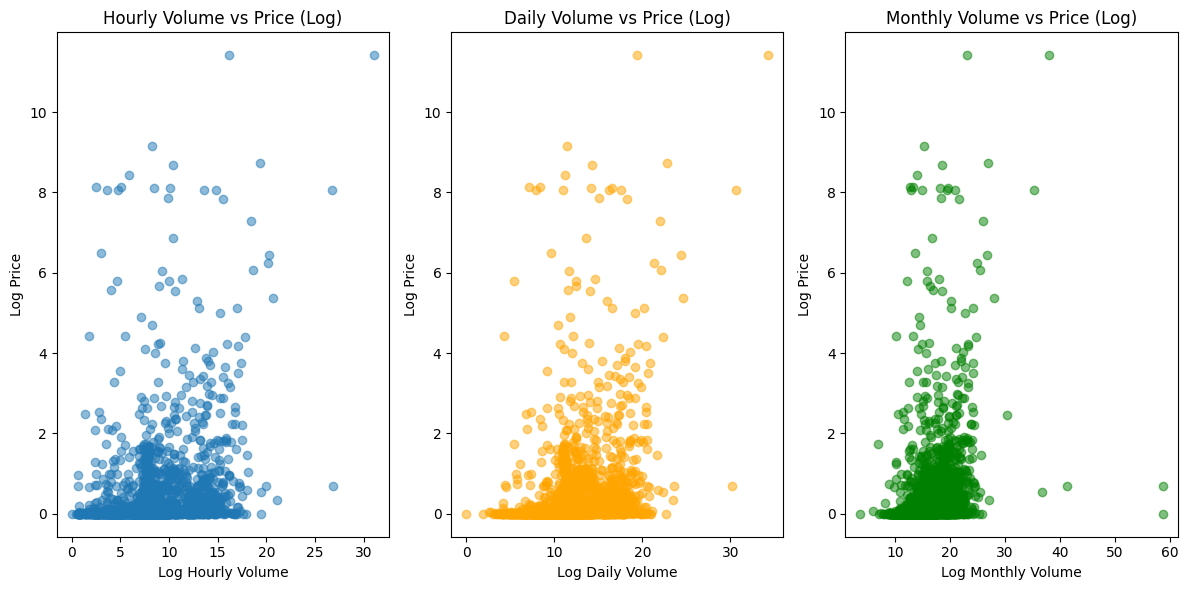

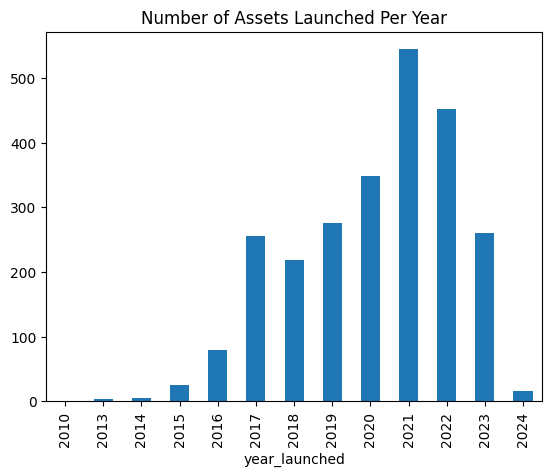

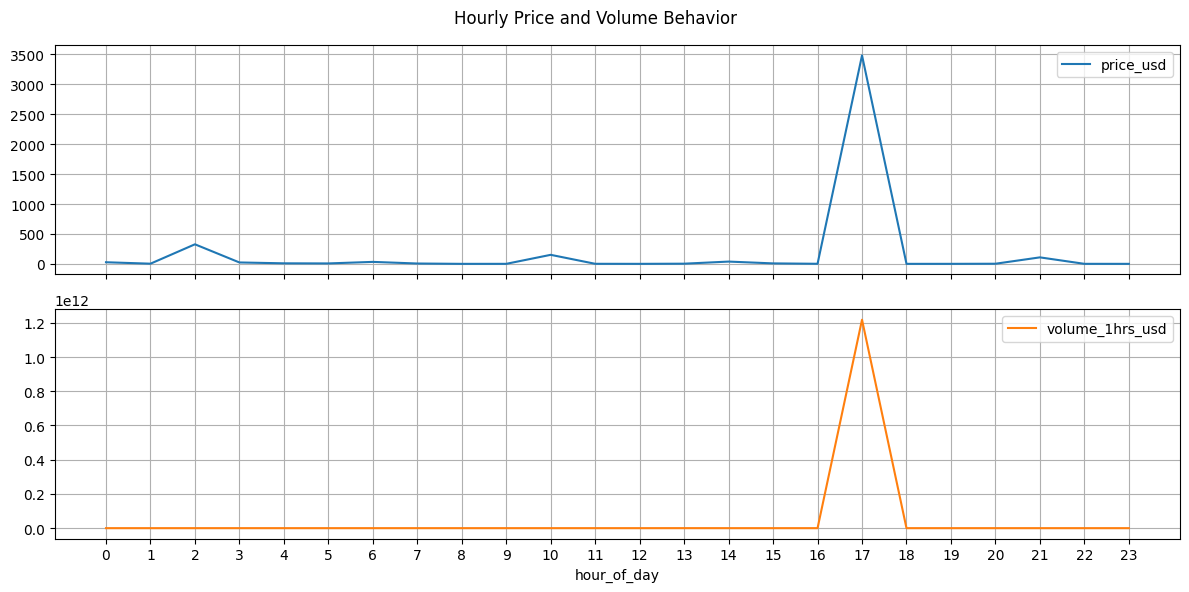

In [3]:

#Scatter plot for relationships between log-transformed volumes and prices
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(df['log_volume_1hrs_usd'], df['log_price_usd'], alpha=0.5)
plt.title('Hourly Volume vs Price (Log)')
plt.xlabel('Log Hourly Volume')
plt.ylabel('Log Price')

plt.subplot(1, 3, 2)
plt.scatter(df['log_volume_1day_usd'], df['log_price_usd'], alpha=0.5, color='orange')
plt.title('Daily Volume vs Price (Log)')
plt.xlabel('Log Daily Volume')
plt.ylabel('Log Price')

plt.subplot(1, 3, 3)
plt.scatter(df['log_volume_1mth_usd'], df['log_price_usd'], alpha=0.5, color='green')
plt.title('Monthly Volume vs Price (Log)')
plt.xlabel('Log Monthly Volume')
plt.ylabel('Log Price')

plt.tight_layout()
plt.show()

print("\n")


#bar graph of assets launched by year
df['year_launched'] = df['data_trade_start_date'].dt.year
# Group by 'year_launched' and count the number of assets launched per year
assets_per_year = df.groupby('year_launched').size()
# Plot the results
assets_per_year.plot(kind='bar', title="Number of Assets Launched Per Year")


print("\n")

#line plot of hourly price and volume behaviour
df['hour_of_day'] = df['data_orderbook_start_time'].dt.hour
ax = df.groupby('hour_of_day')[['price_usd', 'volume_1hrs_usd']].mean().plot(kind='line', subplots=True, figsize=(12, 6), title="Hourly Price and Volume Behavior")


# Customize x-axis for more divisions
for axis in ax:
    axis.set_xticks(range(0, 24))  
    axis.set_xticklabels(range(0, 24))  
    axis.grid(True)

plt.tight_layout()
plt.show()

-----------------------------------

Scatter plot:
The clusters at lower values likely dominate the dataset, which might dilute any potential relationships.
lack of a clear upward or downward trend in the scatter plots indicates that the relationships between volume and price are not strictly linear. This
is quite a surprising plot as one normally expects some sort of a relationship between price and volume regardless of whether it is negative or positive.

Bar graph:
The peak surge is in the year of 2021 for the number of assets launched and this widely links to the earlier prospectus of market sentiments
It was in the this year 2021, that NFT's gained popularity and investors started exploring different possibilities
the drop indicates a shift in investor sentiment

Line plot:
In the price based graph, the surge again after 1-3 at 9-12 shows the start of trading activity.
The surge shows end of the day trading and even price manipulation at that hours
If there is certain news happening at those hours, monitoring that to see if surge is real can help traders 

------------------------------------

In [ ]:
top_10_volume = df.sort_values(by='volume_1hrs_usd', ascending=False).head(10)
bottom_10_volume = df.sort_values(by='volume_1hrs_usd', ascending=True).head(10)

high_volume_assets = df[df['asset_id'].isin(top_10_volume['asset_id'])]
low_volume_assets = df[df['asset_id'].isin(bottom_10_volume['asset_id'])]

high_volume_assets_avg = high_volume_assets[['price_usd', 'volume_1hrs_usd']].mean()
low_volume_assets_avg = low_volume_assets[['price_usd', 'volume_1hrs_usd']].mean()

print("\n")

print("High Volume Assets Average:\n", high_volume_assets_avg)
print("\nLow Volume Assets Average:\n", low_volume_assets_avg)

print("\n")

print(top_10_volume[['asset_id', 'name', 'volume_1hrs_usd', 'price_usd']])

print("\n")

----------------------------------

The correlation suggests that most actively traded ones are thsoe that are most established as well. (arrived at because price of high volume assets are on average higher.
Investing in high volume assets is less risky for investors.


Finally, after all analysis, the table in the end shows the top 10 assets that are less risky to invest in  at the moment.

---------------------------------


------------------------------

3.PROJECT MANAGEMENT

----------------------------

3. Reflect on project management (approx 250 words) 
    - Timeliness: Reflect on how consistently you made an effort meet deadlines
    - Organization: Reflect on how managed the code-base as the project size increased

-----------------------------------------------------

Throughout the project, timeliness was a key focus. Each milestone was approached with a structured plan to ensure deadlines were met. I did so by splitting into tasks and keeping deadlines for each one. So, these included data-cleaning, data-preparing, data-visualisation, and data-analysis. I had allocated one week for each of these but was able to complete the whole project within 3 weeks of commencement. The most amount of delay I had was in the initial phase when I had to figure out which API to work with. After that there was also some amount of time spent in cleaning and preparing data however ensuring that even if I had taken all 4 weeks, and still having buffer time left gave a sense of relaxation and not much of pressure to complete. This allowed me to do this project completely to my satisfaction whilst taking my own cool time.

For organization, I had beforehand created a folder in my workspace containing different python files each split into the different tasks of cleaning, preparing and so. This ensured that if I had to refer or amend code from a certain area then it was readily available. The scripts being organised into functional modules really assisted the whole process due to which there was no sense of confusion even when the project scaled.
I also ensured to document my code properly with inline comments again ensuring the whole process was structured and easily understandable. Using git control also helped me keep track of changes and rollbacks when necessary. 

-----------------------------------------------------


-------------------------
4. PROCESS REFLECTION
----------------------------

4. Process reflection (approx 200 words) - Discuss the week by week iterative development of your chatbot.
    - Describe each week of chatbot devleopment.
    - What was the feedback you received? How did you work on the feedback to improve EDA? What new features did you add? 

-----------------------------------------------------

For the EDA on cryptocurrency, the first week and a half was spent mainly on preparation, understanding concepts, and simultaneously working on lab tasks to get a complete vision of what I intend to. Once I decided that my domain of analysis would be cryptocurrencies, my next step was to find different APIs available. Some of the ones I ended up shortlisting were coin gecko, coin market gap, crypto compare (less free features) and coin api. After weighing out pros and cons of each I decided to go with coinapi. Once this was through, I had to decide which product of theirs I should use – market data, ems trading, flat files, indexes. I ended up going with the market data API which had historical data that suited best for market analysis. 

The next few days were spent on firstly converting the json to a csv and then cleaning it using python techniques, changing data type formats, and removing unwanted fields and null values. Since some data-date fields came with merged time, I had to split them into different columns as well. There was a type_is_crypto field which included non-cryptos as well that I filtered out for my analysis. In the end the 23 columns and 18681 rows of data extracted had been reduced to 12 columns and 2483 entries that were required for my analysis. Receiving feedback at this stage regarding my thought process and work flow helped assure that I was on the right track.

The next week was spent on figuring out what kind of an analysis could be carried out with the data I had and researching and reading a lot on matplotlib to figure out right ways to achieve desired visualisations. Towards the end of this week, I started adding my advanced features.
The final few days of my project timeline was spent just refining and rechecking my code, analysis, and insights.

These reflections and analyses underscore the importance of iterative development, rigorous data cleaning, and advanced techniques in delivering actionable insights through EDA functionality.


-----------------------------------------------------
